In [1]:
#librerias 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os 
import re 
import seaborn as sns
sns.set_theme()

import matplotlib.colors as mcolors


In [2]:
BASE_DATA_DIR="../data2apply/"
data_dir=os.path.join(BASE_DATA_DIR,"pump_data")
train_dir=os.path.join(data_dir,"sensor.csv")

In [4]:
df=pd.read_csv(train_dir,index_col=0)
df["machine_status"]=df["machine_status"].map({"NORMAL":0,"RECOVERING":-1,"BROKEN":-2})

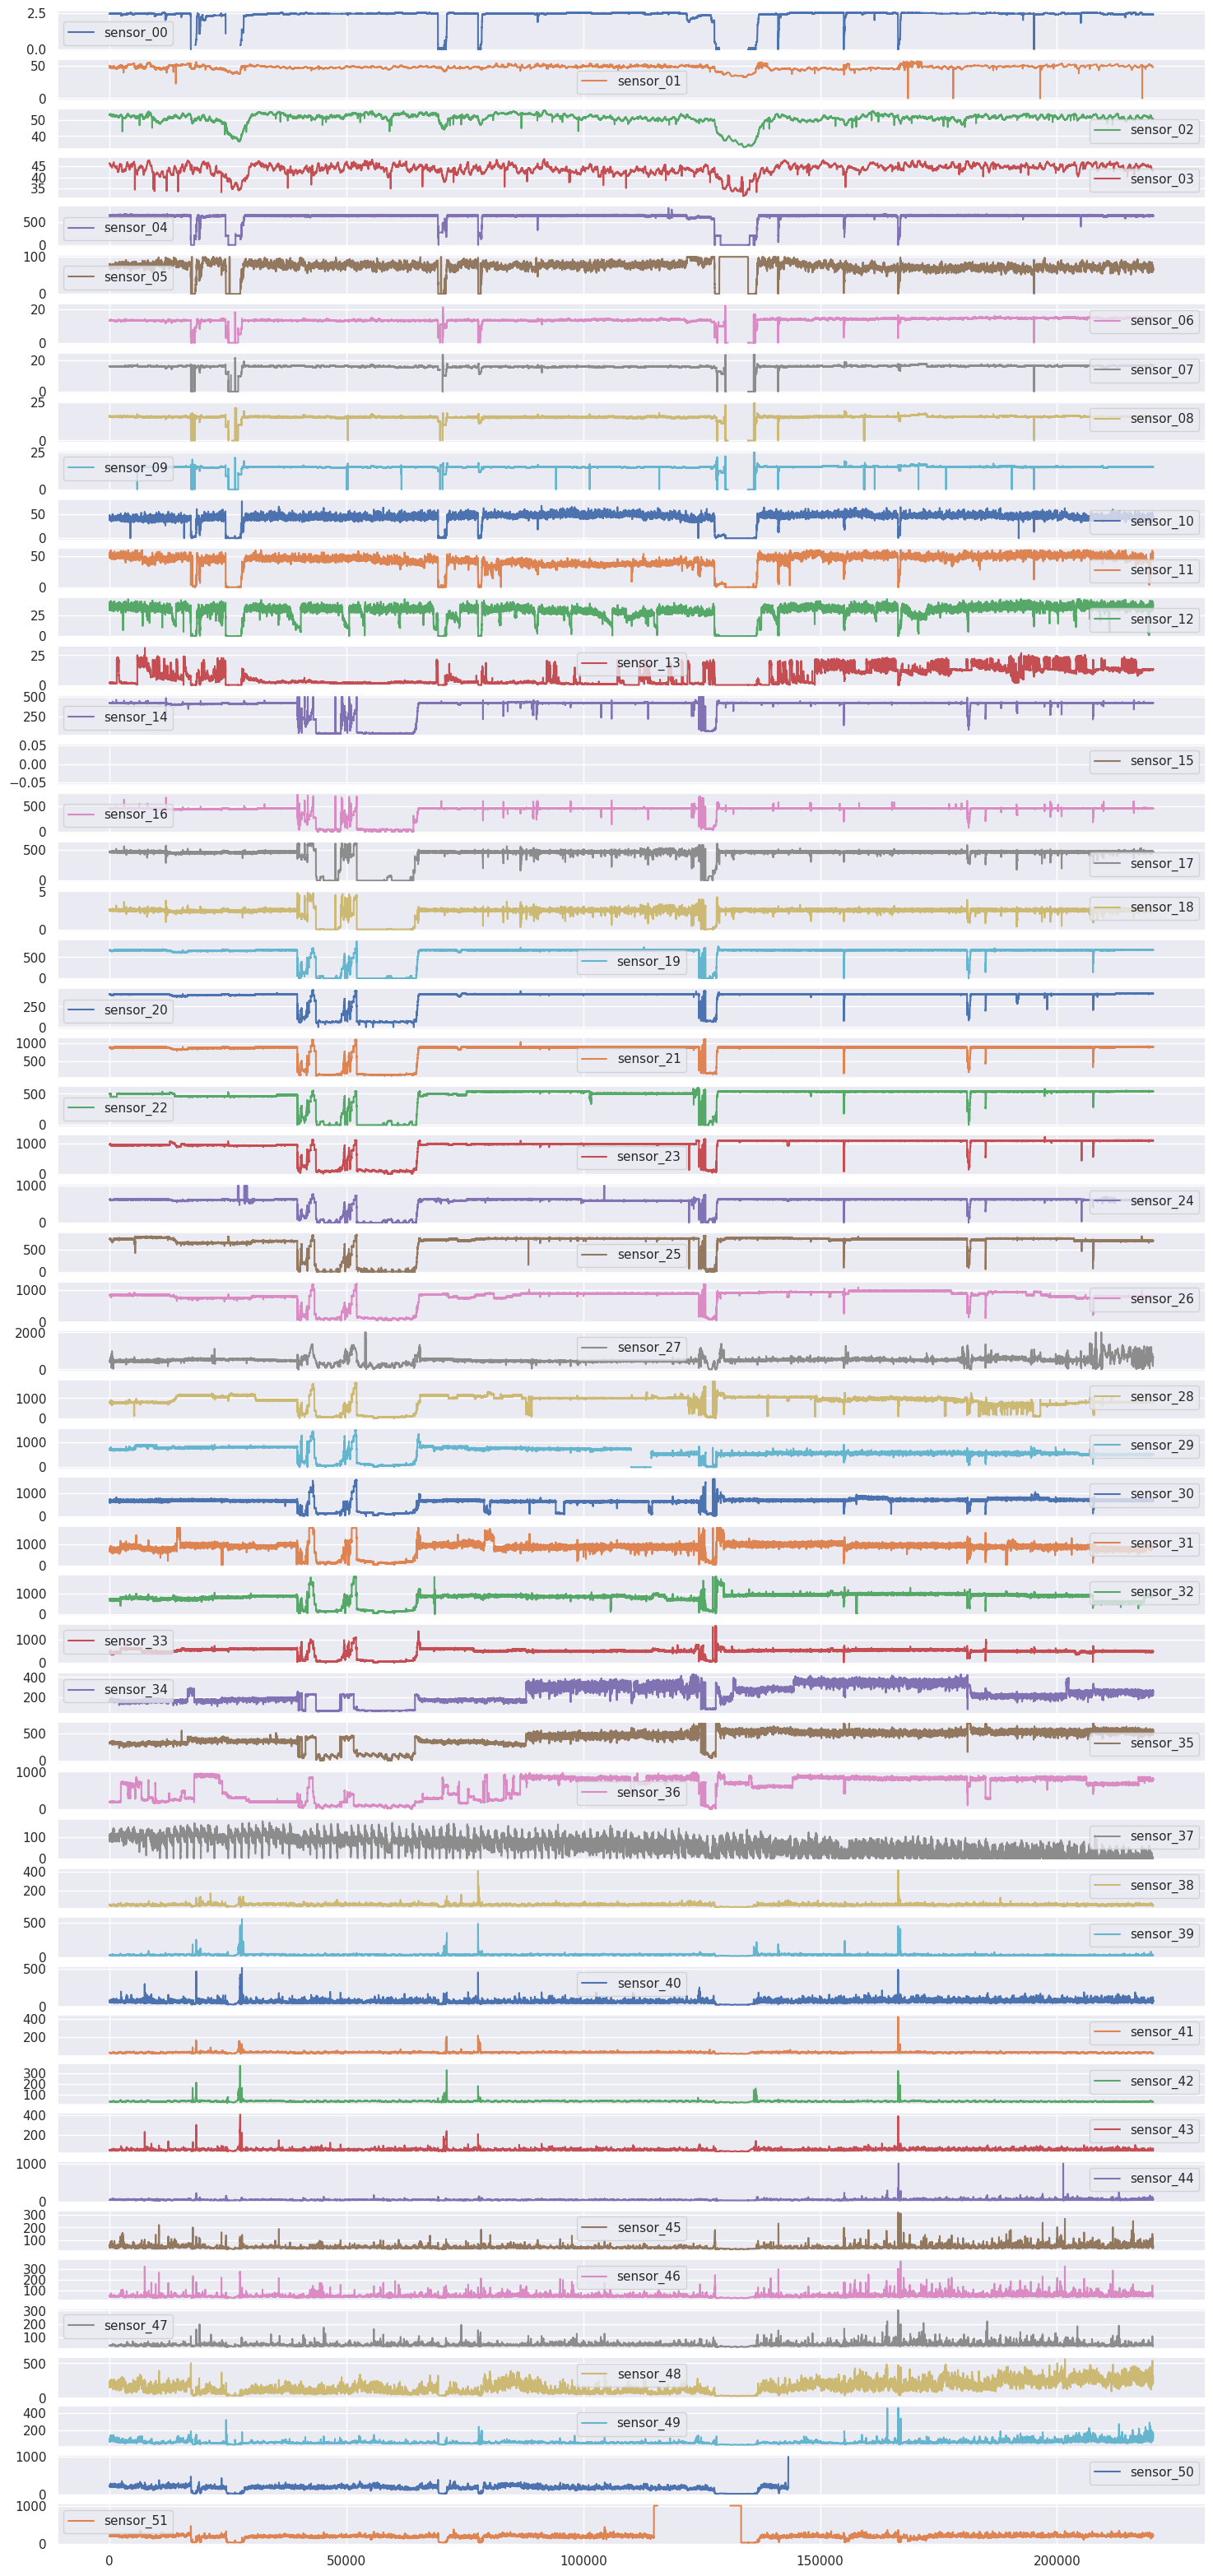

In [5]:
def add_shaded_region(start, end, axes, color='red', alpha=0.3):
    for ax in axes:
        ax.axvspan(start, end, color=color, alpha=alpha)


# Identificar y sombrear las regiones donde machine status es distinto de 0
regions = []
start = None
for index, value in df['machine_status'].items():
    if value != 0 and start is None:
        start = index
    elif value == 0 and start is not None:
        regions.append((start, index))
        start = None

if start is not None:
    regions.append((start, len(df)))

i=0
for start, end in regions:
    if start == end - 1:  # Si solo hay una muestra, dibuja una línea vertical
        for ax_aux in ax:
            ax_aux.axvline(start, color="red", alpha=0.3)
            i+=1
    else:
        add_shaded_region(start, end, ax)

plt.show()

ax=df.iloc[:,1:-1].plot(subplots=True,figsize=(18,40))


sensor_00
sensor_01
sensor_02
sensor_03
sensor_04
sensor_05
sensor_06
sensor_07
sensor_08
sensor_09
sensor_10
sensor_11
sensor_12
sensor_13
sensor_14
sensor_15
sensor_16
sensor_17
sensor_18
sensor_19
sensor_20
sensor_21
sensor_22
sensor_23
sensor_24
sensor_25
sensor_26


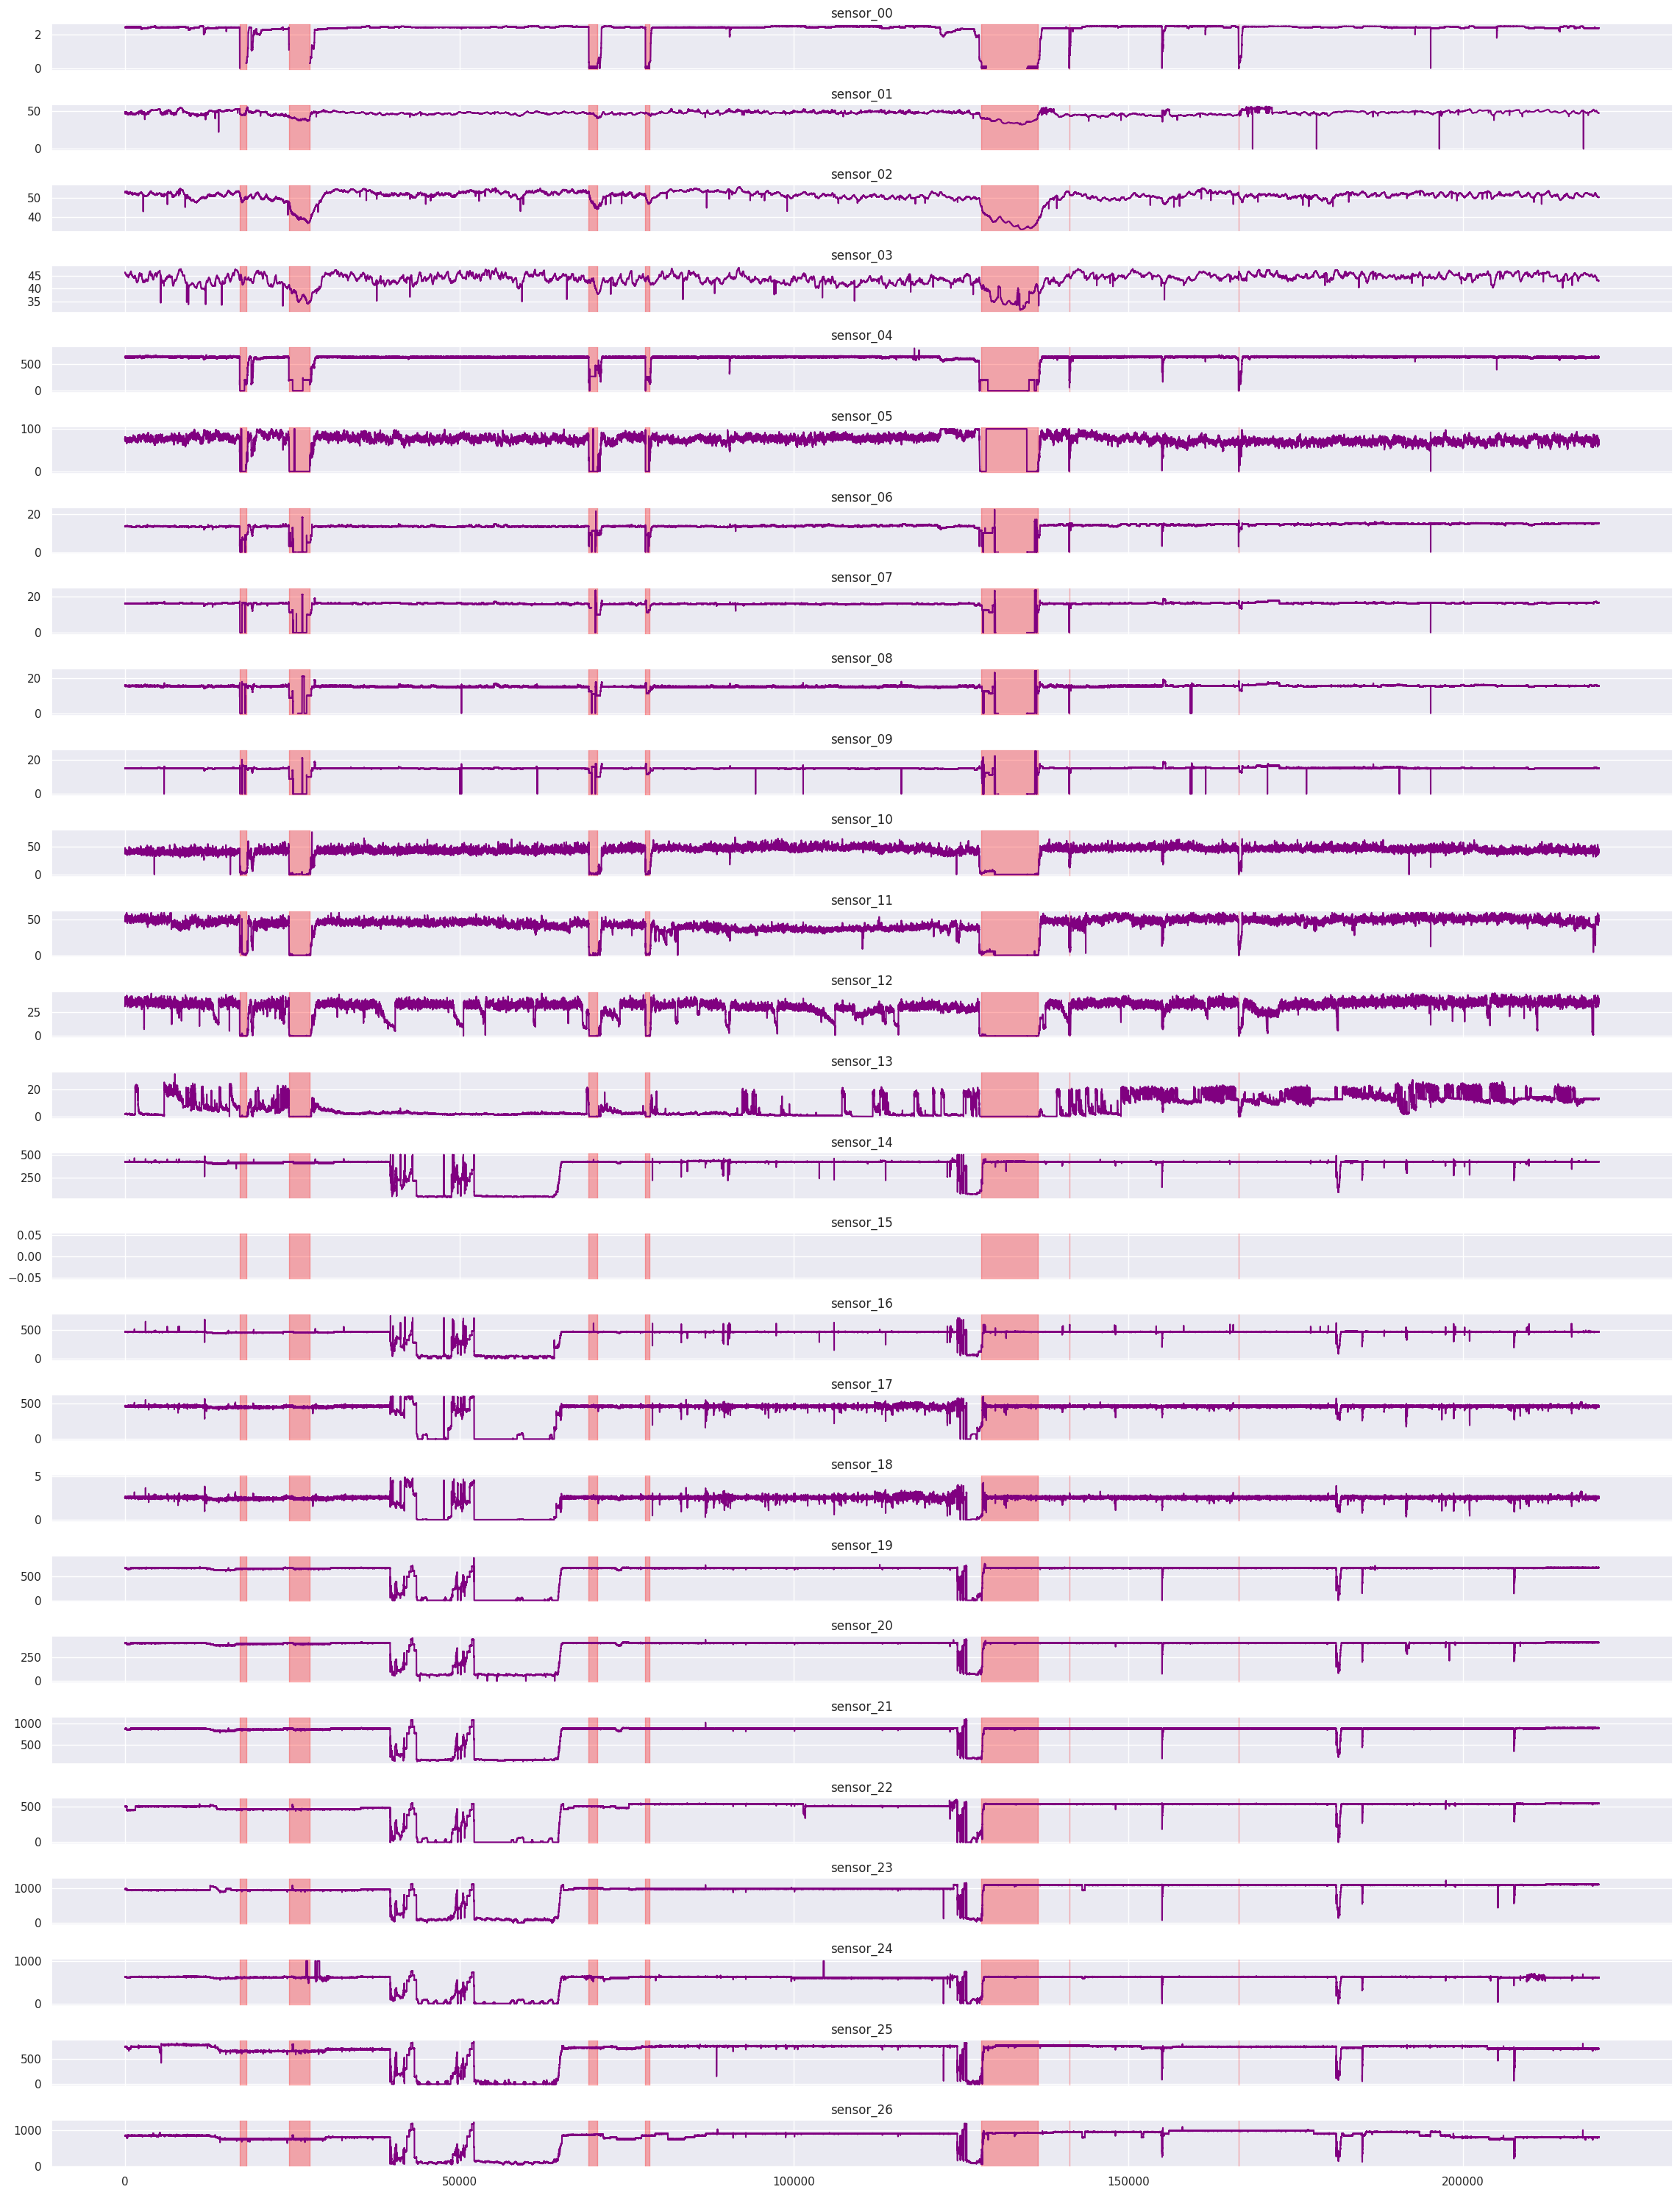

In [13]:

df_señal=df.iloc[:,1:-26]


fig, axes = plt.subplots(nrows=len(df_señal.columns), ncols=1, figsize=(23, 30),sharex=True)
for i,name in enumerate(df_señal.columns):
    print(name)
    axes[i].plot(df_señal[name],color="purple")
    axes[i].set_title(name)




# Función para agregar el área sombreada
def add_shaded_region(start, end, axes, color='red', alpha=0.3):
    for ax in axes:
        ax.axvspan(start, end, color=color, alpha=alpha)


# Identificar y sombrear las regiones donde machine status es distinto de 0
regions = []
start = None
for index, value in df['machine_status'].items():
    if value != 0 and start is None:
        start = index
    elif value == 0 and start is not None:
        regions.append((start, index))
        start = None

if start is not None:
    regions.append((start, len(df)))

i=0
for start, end in regions:
    if start == end - 1:  # Si solo hay una muestra, dibuja una línea vertical
        for ax in axes:
            ax.axvline(start, color="red", alpha=0.3)
            i+=1
    else:
        add_shaded_region(start, end, axes)

plt.tight_layout()